In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [13]:
D = 10**3
points = np.linspace(0.001, D, 1000*D)
size = 1000*D
gap = D / size
CDF = np.zeros(size)
PDF = np.zeros(size-1)
gumbel = np.exp(-(points + np.exp(-points)))
# Set up CDF
CDF = np.exp(-points)
for i in range(size-1):
  PDF[i] = (CDF[i+1] - CDF[i]) / gap

In [14]:
def totalVariation(N):
  cdfMax = CDF ** N
  pdfMax = N * (CDF[0:size-1] ** (N-1)) * PDF
  integral = 0
  for i in range(size-1):
    integral += abs(pdfMax[i] - gumbel[i]) * gap
  return integral / 2

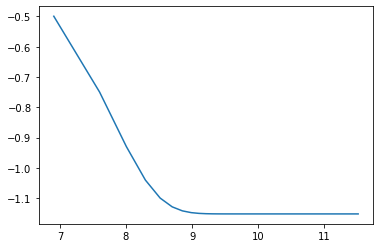

In [15]:
Ns = np.linspace(10**3, 10**5, 100)
TV = np.zeros(len(Ns))
for i in range(len(Ns)):
  TV[i] = totalVariation(Ns[i])

plt.plot(np.log(Ns), np.log(TV))
plt.show()